# Import Libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warning
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud,STOPWORDS

# Set option max columns display
pd.set_option('max_colwidth', 550)
pd.set_option('max_info_rows', 500)

# Data Overview

In [3]:
df = pd.read_csv('spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
print(f'Dataset contains of {df.shape[0]} Rows')

Dataset contains of 5572 Rows


In [6]:
# check null and duplicated values
print('Check null values : ')
print(df.isnull().sum())
print('\n')
print('Check duplicated values : ')
print(df.duplicated().sum())

Check null values : 
label      0
message    0
length     0
punct      0
dtype: int64


Check duplicated values : 
403


In [11]:
# Drop duplicated values
df.drop_duplicates(inplace=True)
print(f'Num of duplicated values: {df.duplicated().sum()}')

Num of duplicated values: 0


In [12]:
print(f'Dataset contains of {df.shape[0]} Rows')

Dataset contains of 5169 Rows


# Exploratory Data Analysis

In [13]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


## Univariate Analysis - Target Feature

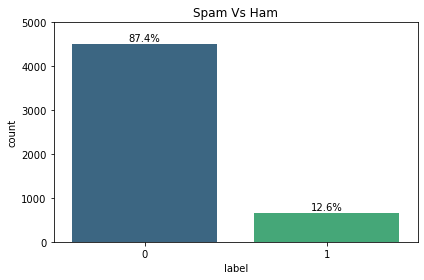

In [149]:
atrate = sns.countplot(df['label'], palette='viridis')
total = len(df)
for p in atrate.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    atrate.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Spam Vs Ham')
plt.tight_layout()
plt.ylim(0,5000)
plt.show()

## Bivariate Analysis - Length Feature

<AxesSubplot:xlabel='length', ylabel='Count'>

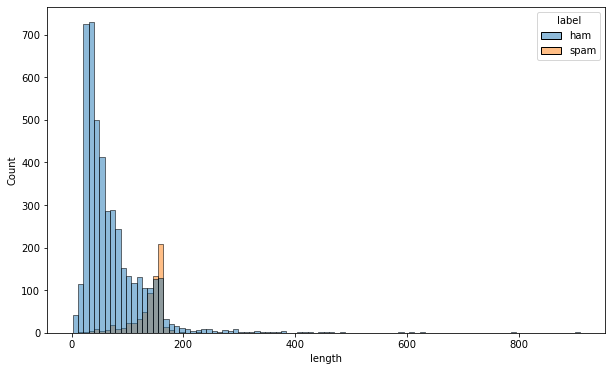

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['length'], hue=df['label'])

## WordCloud

In [35]:
spam = df[df['label'] == 'spam']
ham = df[df['label'] == 'ham']

print(f'Num of Spam : {len(spam)}')
print(f'Num of Ham : {len(ham)}')

Num of Spam : 653
Num of Ham : 4516


### Spam

In [42]:
stopwords=set(STOPWORDS)

In [43]:
tot_text=(''.join(spam['message']))

In [44]:
print('Total Text Length :', len(tot_text))

Total Text Length : 89921


In [45]:
import re
total_text = re.sub('[^a-zA-Z]',' ',tot_text) 

#remove except a-z, A-Z, replace with space, in total text

In [47]:
total_text[0:1500]

'Free entry in   a wkly comp to win FA Cup final tkts   st May       Text FA to       to receive entry question std txt rate T C s apply            over   sFreeMsg Hey there darling it s been   week s now and no word back  I d like some fun you up for it still  Tb ok  XxX std chgs to send        to rcvWINNER   As a valued network customer you have been selected to receivea      prize reward  To claim call              Claim code KL     Valid    hours only Had your mobile    months or more  U R entitled to Update to the latest colour mobiles with camera for Free  Call The Mobile Update Co FREE on            SIX chances to win CASH  From     to        pounds txt  CSH   and send to        Cost    p day   days      TsandCs apply Reply HL   infoURGENT  You have won a   week FREE membership in our          Prize Jackpot  Txt the word  CLAIM to No        T C www dbuk net LCCLTD POBOX     LDNW A RW  XXXMobileMovieClub  To use your credit  click the WAP link in the next txt message or click her

In [48]:
# bcs there are many of extra spaces, remove it
#remove extra spaces (' +') with a single space (' ')

total_text = re.sub(' +', ' ', total_text)

In [49]:
total_text[0:1500]

'Free entry in a wkly comp to win FA Cup final tkts st May Text FA to to receive entry question std txt rate T C s apply over sFreeMsg Hey there darling it s been week s now and no word back I d like some fun you up for it still Tb ok XxX std chgs to send to rcvWINNER As a valued network customer you have been selected to receivea prize reward To claim call Claim code KL Valid hours only Had your mobile months or more U R entitled to Update to the latest colour mobiles with camera for Free Call The Mobile Update Co FREE on SIX chances to win CASH From to pounds txt CSH and send to Cost p day days TsandCs apply Reply HL infoURGENT You have won a week FREE membership in our Prize Jackpot Txt the word CLAIM to No T C www dbuk net LCCLTD POBOX LDNW A RW XXXMobileMovieClub To use your credit click the WAP link in the next txt message or click here http wap xxxmobilemovieclub com n QJKGIGHJJGCBLEngland v Macedonia dont miss the goals team news Txt ur national team to eg ENGLAND to Try WALES 

Text(0.5, 1.0, 'Spam Word Cloud')

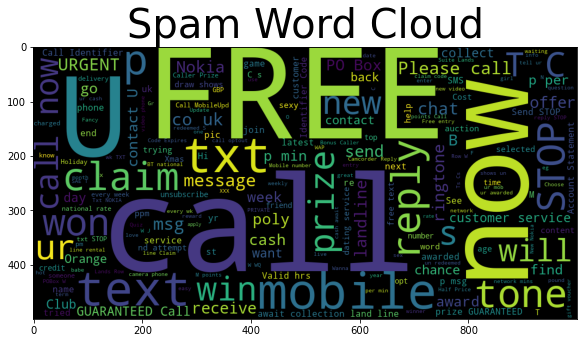

In [52]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.title('Spam Word Cloud', fontsize=40)

### Ham

In [53]:
tot_text=(''.join(ham['message']))

In [54]:
print('Total Text Length :', len(tot_text))

Total Text Length : 320213


In [55]:
import re
total_text = re.sub('[^a-zA-Z]',' ',tot_text) 

#remove except a-z, A-Z, replace with space, in total text

In [56]:
# bcs there are many of extra spaces, remove it
#remove extra spaces (' +') with a single space (' ')

total_text = re.sub(' +', ' ', total_text)

Text(0.5, 1.0, 'Ham Word Cloud')

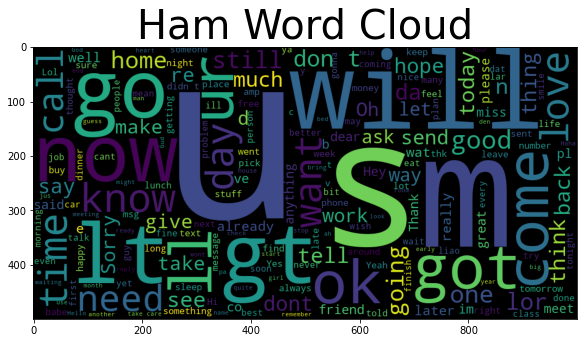

In [57]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.title('Ham Word Cloud', fontsize=40)

# Modeling

In [59]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [62]:
df['label'] = np.where(df['label'] == 'ham',0,1)
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

## Split the data into train & test sets

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df['message'], 
                                                     df['label'], 
                                                     test_size=0.2, 
                                                     random_state=123, 
                                                     shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135,), (1034,), (4135,), (1034,))

## Random Forest

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score

In [87]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , 
                       ("classifier", RandomForestClassifier(n_estimators=100))])

# fit
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)

# accuracy score
accuracy_score(y_test, y_pred)

0.9680851063829787

<AxesSubplot:>

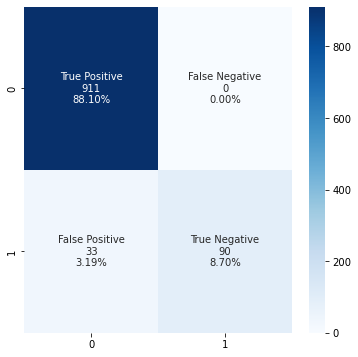

In [88]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       911
           1       1.00      0.76      0.86       123

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034



## SVC

In [86]:
from sklearn.svm import SVC

# pipeline
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

# fit
svm.fit(X_train, y_train)

# predict
y_pred_svc = svm.predict(X_test)

# acc score
accuracy_score(y_test, y_pred_svc)

0.8810444874274661

<AxesSubplot:>

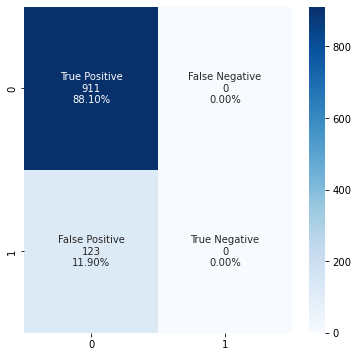

In [89]:
cf_matrix = confusion_matrix(y_test, y_pred_svc)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [90]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       911
           1       0.00      0.00      0.00       123

    accuracy                           0.88      1034
   macro avg       0.44      0.50      0.47      1034
weighted avg       0.78      0.88      0.83      1034



## XGBClassifier

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

# pipeline
gbc = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", GradientBoostingClassifier(max_depth=15))])

# fit
gbc.fit(X_train, y_train)

# predict
y_pred_gbc = gbc.predict(X_test)

# acc score
accuracy_score(y_test, y_pred_gbc)

0.9690522243713733

<AxesSubplot:>

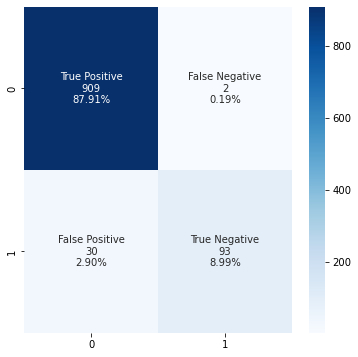

In [95]:
cf_matrix = confusion_matrix(y_test, y_pred_gbc)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [96]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       911
           1       0.98      0.76      0.85       123

    accuracy                           0.97      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034



# Testing

In [141]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']
test4 = ['You are the winner, Your Mobile number has been awarded as winner, get your rewards and claim via https:ajwad.com']
test5 = ['Hey. I repeat, just text the word ok on your mobile phone and send to 123123']
test6 = ['How you doing? I hope you are pretty good conditions']
         
test_group = [test1, test2, test3, test4, test5, test6]

In [148]:
for i in test_group:
    pred = classifier.predict(i)
    if pred == 0:
        print('This text is HAM :')
        print(i)
    else:
        print('This text is SPAM :')
        print(i)
        
    print('\n')

This text is HAM :
['Hello, You are learning natural Language Processing']


This text is HAM :
['Hope you are doing good and learning new things !']


This text is SPAM :
['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']


This text is SPAM :
['You are the winner, Your Mobile number has been awarded as winner, get your rewards and claim via https:ajwad.com']


This text is SPAM :
['Hey. I repeat, just text the word ok on your mobile phone and send to 123123']


This text is HAM :
['How you doing? I hope you are pretty good conditions']


